In [24]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt

In [25]:
data = np.loadtxt('./dataset.txt')
# print(data)
features = data.shape[1]-1
# print(features)
x_train = np.array(data[:,:features])
print(x_train.shape)
y_train = np.array(data[:,-1])

(506, 13)


In [26]:
def generate_polynomial_features(X, degree):
    from itertools import combinations_with_replacement
    n_samples, n_features = X.shape
    
    def iter_combinations():
        for total_degree in range(1, degree + 1):
            for comb in combinations_with_replacement(range(n_features), total_degree):
                yield comb
    
    comb = list(iter_combinations())
    n_output_features = len(comb)
    X_poly = np.empty((n_samples, n_output_features))
    
    for i, indices in enumerate(comb):
        X_poly[:, i] = np.prod(X[:, indices], axis=1)
    
    return X_poly
x_train_poly = generate_polynomial_features(x_train, 2)


In [27]:
def zscore_normalize_features(X):
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      
    return X_norm
x_norm = zscore_normalize_features(x_train_poly)

In [28]:
def zscore_normalize_target(Y):
    # find the mean of each column/feature
    mu     = np.mean(Y, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(Y, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    Y_norm = (Y - mu) / sigma      
    return Y_norm

In [29]:
def compute_cost(x_in, y_in, w_in, b_in):
    f_wb=np.dot(x_in,w_in)+b_in 
    cost = (f_wb -y_in)**2
    cost = np.sum(cost)/(2*np.shape(x_in)[0])
    return cost

In [30]:
def compute_gradient(x_in, y_in, w_in, b_in):
    m=x_in.shape[0]
    pred = np.dot(x_in, w_in) + b_in
    costs = pred - y_in
    dj_dw = np.dot(x_in.T, costs)/m
    dj_db = np.sum(costs)/m
    return dj_dw, dj_db

In [31]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradent_function, alpha, iters):
    J_history=[]
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(iters):
        dj_dw,dj_db = gradent_function(x, y, w, b)

        w = w - alpha *dj_dw
        b = b - alpha *dj_db

        if i<10000:
            J_history.append(cost_function(x, y, w, b))

        if i%math.ceil(iters /10) ==0:
            print(f"iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w,b,J_history

In [32]:
initial_w = np.zeros(x_norm.shape[1])
initial_b = 0
iterations = 90000
alpha = 4.669e-2
w_final, b_final, J_hist = gradient_descent(x_norm, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

iteration    0: Cost   264.22
iteration 9000: Cost     3.68
iteration 18000: Cost     3.65
iteration 27000: Cost     3.65
iteration 36000: Cost     3.65
iteration 45000: Cost     3.65
iteration 54000: Cost     3.65
iteration 63000: Cost     3.65
iteration 72000: Cost     3.65
iteration 81000: Cost     3.65
b,w found by gradient descent: 22.53,[ -1.11794284  -3.25129139 -11.93558964   5.59348459   1.41011136
  13.23822107  15.97742912 -11.3141845    9.17507992   2.32599302
   5.77249732  11.44842339   5.23510841   1.03836057   0.40392495
   4.39409252   2.18962383  -6.17512879   6.05086934  -2.78896475
  -1.00976158  -3.65519613  -0.63054706  -0.73615622  -0.76369994
   3.94149509   0.57797328  -0.11468086  -0.30278883  -2.56772477
   1.91775663  -0.06196573  -1.81542844  -0.0628964    3.19374204
   0.80694063   1.82904596  -0.67189199   3.71484824  -0.45264834
   8.68418163   4.56410943   2.71845794   0.92298104   4.85964077
   2.80958951  -7.13326975   0.78181354  -3.00454463   5.5934

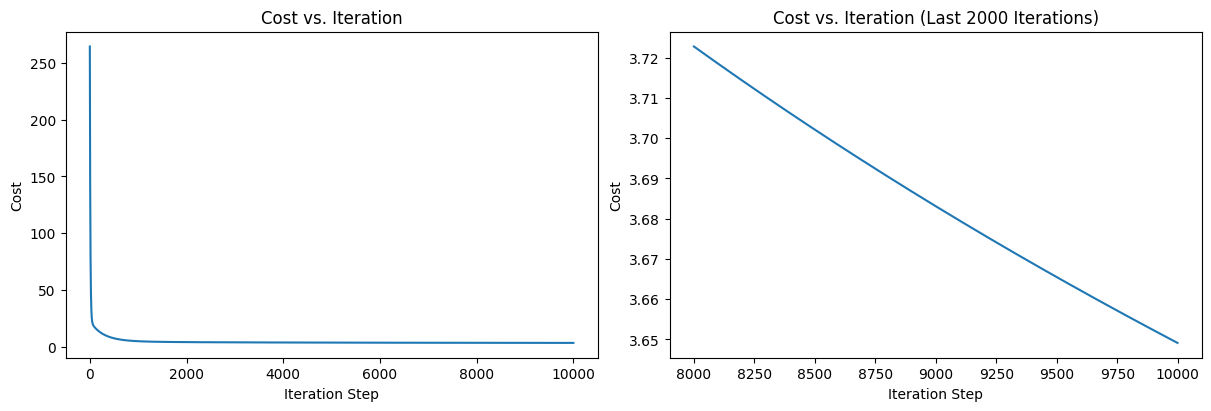

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Full cost history
ax1.plot(J_hist)
ax1.set_title("Cost vs. Iteration")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration Step')

# Tail of the cost history, showing the last 2000 iterations
# Check if we have at least 2000 iterations
if len(J_hist) >= 2000:
    start_index = -2000  # Start from the iteration 2000 steps from the last
else:
    start_index = -len(J_hist)  # If fewer than 2000, start from the beginning

ax2.plot(np.arange(start_index, 0, 1) + len(J_hist), J_hist[start_index:])
ax2.set_title("Cost vs. Iteration (Last 2000 Iterations)")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration Step')

# Display the plots
plt.show()

(3, 3)


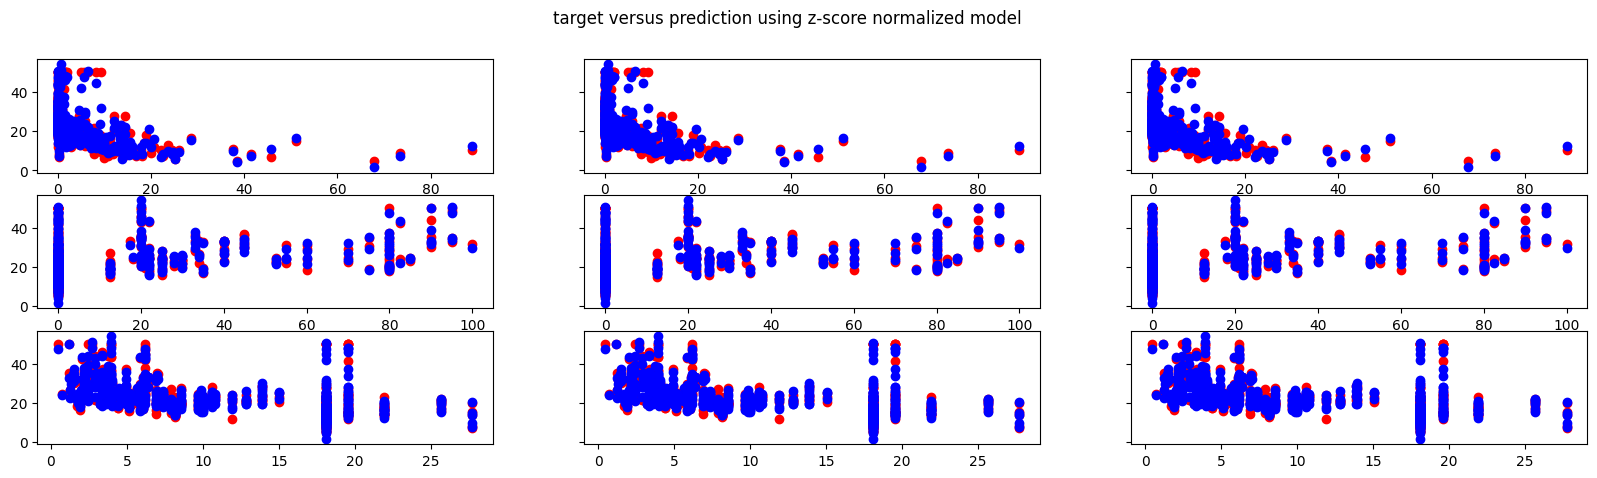

In [34]:
y_hat=np.dot(x_norm,w_final)+ b_final
fig,ax=plt.subplots(3,3,figsize=(20,5),sharey=True)
print(ax.shape)
for i in range(ax.shape[1]):
    for j in range(ax.shape[0]):
        ax[i,j].scatter(x_train[:,i],y_train, label = 'target', c='r')
        # ax[i].set_xlabel(X_features[i])
        ax[i,j].scatter(x_train[:,i],y_hat,c='b', label = 'predict')
# ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()